In [1]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

import plotly.plotly as py
import plotly.graph_objs as go
import plotly
# input your username and api_key for plotly here
#plotly.tools.set_credentials_file(username='', api_key='')

In [2]:
%matplotlib notebook

In [3]:
def f(a: float, b: float, N: int=70, activ_func_choice: str="step"):
    """
    param a: start of x axis
    param b: end of x axis
    param N: number of points to compute the function on
    param activ_func_choice: choice of activation function

    """

    scale_sigm = 100
    x_split = 1000

    # the funtion to approximate
    def f(x):
        return 0.2 + 0.4 * x ** 2 + 0.3 * np.sin(15 * x) + 0.05 * np.cos(50 * x)

    if activ_func_choice is 'step':
        activ = lambda x: np.heaviside(x, 1)
    elif activ_func_choice is 'sigmoid':
        activ = lambda x: 1 / (1 + np.exp(-x * scale_sigm))
    else: #default
        activ = lambda x: np.heaviside(x, 1) # step

    plt.figure()
    range_x = np.linspace(a, b, x_split)
    fx = f(range_x)
    plt.plot(range_x, fx)
    range_N = np.arange(N+1)
    h = (b - a) / (N + 1)
    fap = [
        f(a) + 
        np.sum(
            (f(a + (range_N+1) * h) - 
            f(a + range_N * h)) * 
            activ(x - (a + range_N * h))
        )
         for x in range_x]

    plt.plot(range_x, fap)

widgets.interact(f, a=0, b=1, N=(0, 1000, 1), activ_func_choice=['step', 'sigmoid'])

interactive(children=(IntSlider(value=0, description='a', max=1), IntSlider(value=1, description='b', max=3, m…

<function __main__.f(a: float, b: float, N: int = 70, activ_func_choice: str = 'step')>

In [4]:
def feed_forward(x, activ_func_choice = "sigmoid"):
    # param activ_func_choice:
    # sign will give the exact class of the points: -1 or 1
    # sigmoid will give a smoothend value of the class
    # step will not work for this case, as it can't have negative values


    # wieghts between input and hidden layer
    w1 = np.matrix([
        [1, 1],
        [1, 1]
    ])
    # wieghts between hidden and output layer
    w2 = np.matrix([
        [0.7, -0.4]
    ])
    # bias for w1
    b1 = np.array([0.5, -1.5])
    # bias for w2
    b2 = np.array([-1])

    if activ_func_choice is 'sign':
        activ = lambda x: np.sign(x)
    elif activ_func_choice is 'step':
        activ = lambda x: np.heaviside(x, 1)
    elif activ_func_choice is 'sigmoid':
        scale_x = 10
        activ = lambda x: 1 / (1 + np.exp(-x * scale_x))
    else:
        raise ValueError("invalid activation function")

    def feed_forward_calc(x):
        return activ(w2 @ activ(w1 @ x + b1).transpose() + b2)
    
    return feed_forward_calc(x)

In [5]:
x1 = -1
x2 = 1
input_layer = np.array([x1, x2])

print("class with sign funtion:", feed_forward(input_layer, "sign"))
print("class with sigmoid funtion:", feed_forward(input_layer, "sigmoid"))
print("class with step funtion:", feed_forward(input_layer, "step"))

class with sign funtion: [[1.]]
class with sigmoid funtion: [[0.04535361]]
class with step funtion: [[0.]]


In [6]:
x1line = np.linspace(-1, 1, 10)
x2line = np.linspace(-1, 1, 10)
zmat = np.array([feed_forward([x1, x2]) for x1 in x1line for x2 in x2line])
zmat = np.reshape(zmat, (len(x1line), len(x2line)))

<IPython.core.display.Javascript object>


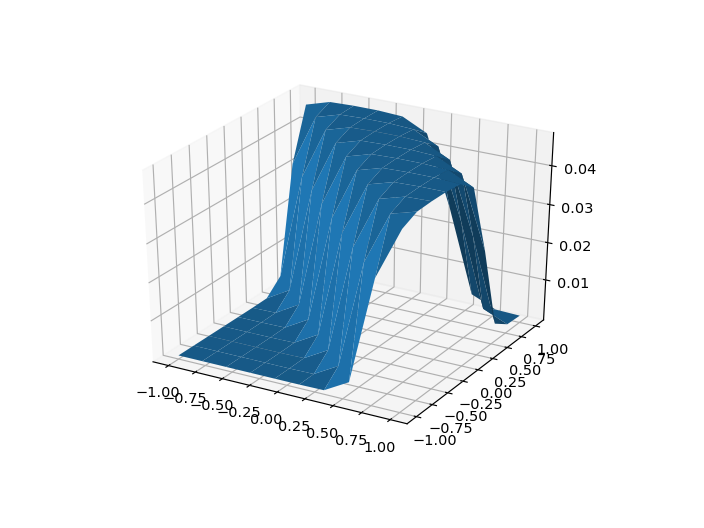

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(x1line, x2line)
ax.plot_surface(X, Y, zmat)

In [8]:
data = [
    go.Surface(
        x = x1line,
        y = x2line,
        z = zmat
    )
]

py.iplot(data, filename='xor3dNN')

C:\Apps\Anaconda3\envs\ids\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

